# Unit 2: The Distribution Explorer

## Learning Outcomes

* Recalling the meaning of frequency, class intervals, and cumulative frequency.
* Explaining how grouped data represents the distribution of a dataset.
* Constructing histograms and ogives to represent grouped data visually.
* Analysing distributions to identify patterns such as spread, concentration, and skewness.

<iframe width="560" height="315" src="https://www.youtube.com/embed/wMBlWhbVbQw?si=O2NIWwunlqKD_oQD" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Introduction

In Class IX, you learned how to describe a dataset using averages and simple graphs. In this unit, you will go deeper. When a dataset becomes large, listing every value is not helpful. Instead, we group values into ranges and study how data is distributed across these ranges.

This idea has been used for a long time. Scholars studying rainfall, population, or crop yield often grouped observations into intervals to understand overall patterns. In this unit, you will explore how grouping data helps reveal structure and trends that are difficult to see otherwise.


## Activity 2.1: Working with a Large Set of Values

We will begin with a dataset of exam scores. Imagine these are the marks obtained by 100 students in a test.

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)

scores = np.random.randint(35, 100, 100)

df = pd.DataFrame({"Score": scores})
df.head()


,Score
0,79
1,82
2,99
3,44
4,56


The dataset contains many values. Looking at all of them together would be confusing, so we need better tools to understand the distribution.

## Activity 2.2: Grouping Data into Class Intervals

Instead of examining individual scores, we group them into ranges called class intervals.

> **Learning Note**
> Grouped data means arranging values into intervals such as 40 to 50, 50 to 60, and so on.
This helps us understand how data is spread across ranges rather than focusing on individual values.

Let us define class intervals of width 10 and count how many scores fall into each interval.

In [3]:
bins = [30, 40, 50, 60, 70, 80, 90, 100]

df["Class Interval"] = pd.cut(df["Score"], bins=bins)
grouped_data = df["Class Interval"].value_counts().sort_index()

grouped_data

Class Interval
(30, 40]     12
(40, 50]     15
(50, 60]     12
(60, 70]     14
(70, 80]     17
(80, 90]     18
(90, 100]    12
Name: count, dtype: int64

Each interval now shows how many students scored within that range.

## Activity 2.3: Visualising Grouped Data with a Histogram

A histogram is a graph that represents grouped data using bars.

> **Learning Note**
> A histogram shows frequency using continuous bars.
It is different from a bar chart because the data is grouped into intervals.

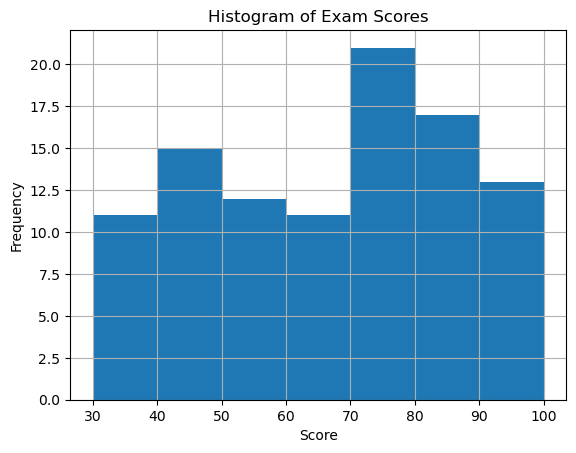

In [4]:
import matplotlib.pyplot as plt

plt.hist(df["Score"], bins=bins)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram of Exam Scores")
plt.grid(True)
plt.show()


The height of each bar shows how many students fall in that score range. This visual view makes it easier to see where most students are concentrated.

## Activity 2.4: Finding Cumulative Frequency

Sometimes, we want to know how many students scored below a certain value. For this, we use cumulative frequency.

Cumulative frequency is the running total of frequencies.

In [5]:
cumulative_frequency = grouped_data.cumsum()
cumulative_frequency

Class Interval
(30, 40]      12
(40, 50]      27
(50, 60]      39
(60, 70]      53
(70, 80]      70
(80, 90]      88
(90, 100]    100
Name: count, dtype: int64

This tells us, for example, how many students scored below 70 or below 80.

## Activity 2.5: Drawing an Ogive

An ogive is a graph of cumulative frequency. It is commonly used in statistics to understand how values accumulate.

> **Learning Note**
> An ogive helps answer questions such as how many observations are less than a given value.
It is a graphical representation of cumulative frequency.

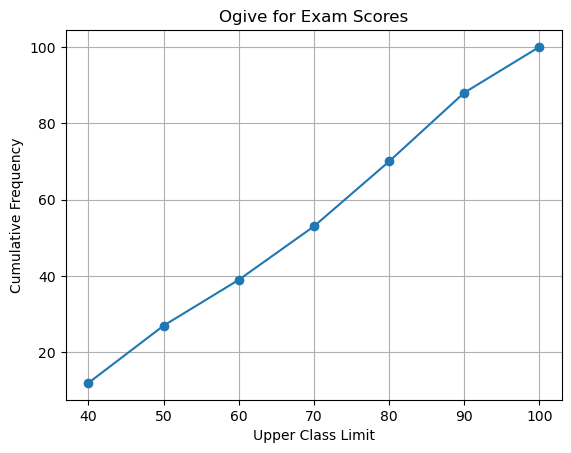

In [6]:
upper_limits = [40, 50, 60, 70, 80, 90, 100]

plt.plot(upper_limits, cumulative_frequency.values, marker="o")
plt.xlabel("Upper Class Limit")
plt.ylabel("Cumulative Frequency")
plt.title("Ogive for Exam Scores")
plt.grid(True)
plt.show()


The curve rises as scores increase, showing how the total number of students grows.

## Practice Tasks

Try the following tasks to deepen your understanding.

1. Change the class interval width to 5 and group the data again.

In [7]:
bins_5 = list(range(35, 101, 5))
df["Class Interval 5"] = pd.cut(df["Score"], bins=bins_5)

grouped_5 = df["Class Interval 5"].value_counts().sort_index()
grouped_5

Class Interval 5
(35, 40]      7
(40, 45]      6
(45, 50]      9
(50, 55]      6
(55, 60]      6
(60, 65]      3
(65, 70]     11
(70, 75]      8
(75, 80]      9
(80, 85]     12
(85, 90]      6
(90, 95]      8
(95, 100]     4
Name: count, dtype: int64

2. Draw a new histogram using the new intervals.

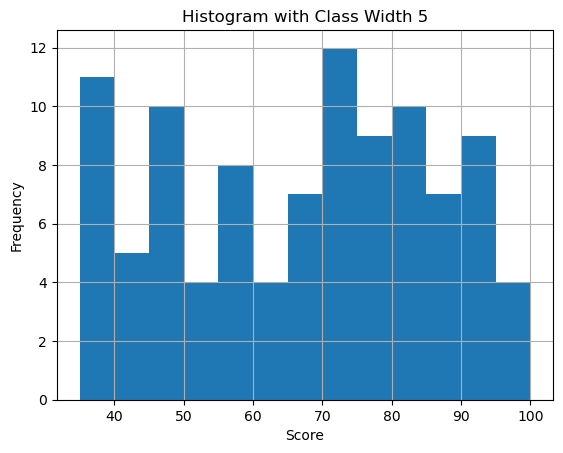

In [8]:
plt.hist(df["Score"], bins=bins_5)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram with Class Width 5")
plt.grid(True)
plt.show()

3. Find the cumulative frequency for the new grouping.

In [9]:
cumulative_5 = grouped_5.cumsum()
cumulative_5

Class Interval 5
(35, 40]      7
(40, 45]     13
(45, 50]     22
(50, 55]     28
(55, 60]     34
(60, 65]     37
(65, 70]     48
(70, 75]     56
(75, 80]     65
(80, 85]     77
(85, 90]     83
(90, 95]     91
(95, 100]    95
Name: count, dtype: int64

4. From the ogive, estimate how many students scored below 75.
> *Hint*: Look at the cumulative frequency value just below 75. This gives an approximate count.

5. Identify the class interval with the highest frequency.

In [10]:
grouped_5.idxmax(), grouped_5.max()


(Interval(80, 85, closed='right'), 12)

## Reflection (Optional)

In this unit, you learned how grouping data reveals patterns that are hidden in raw values. Histograms and ogives helped you see how scores are distributed and how they accumulate.

Reflect on the following:

* Why is grouped data more useful than raw data for large datasets
* How did the histogram help you understand concentration of scores
* What information does an ogive provide that a histogram does not
* Where might grouped data be useful in real life, such as population or rainfall studies